# Линейная регрессия

Лабораторная работа посвящена линейной регрессии — одному из базовых алгоритмов машинного обучения.<br>
Данный алгоритм решает задачу предсказания численного значения на основе одного или нескольких входных признаков.

Линейная регрессия строит модель вида:

$$ y = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b $$

где:

• $x_1, \dots, x_n$ — входные признаки <br>
• $w_1, \dots, w_n$ — коэффициенты, которые "весом" определяют вклад каждого признака<br>
• $b$ — свободный член (сдвиг), позволяющий линии регрессии пересекать ось $y$

**Главная цель:**

Понять, как **находить параметры линейной модели**, минимизирующие квадратичную ошибку между предсказанием модели и наблюдаемыми данными — как **в аналитическом виде** (прямое решение), так и численно, с помощью **градиентного спуска** — итеративного метода оптимизации.


| Метод              | Преимущество                                                | Недостаток                                                                 |
|--------------------|-------------------------------------------------------------|-----------------------------------------------------------------------------|
| Аналитический      | Быстрое точное решение <br> при малых объёмах данных        | Плохо масштабируется при больших данных <br> (требует обращения матриц)   |
| Градиентный спуск  | Хорошо масштабируется <br> на большие данные                | Требует настройки гиперпараметров <br> (шаг обучения, количество итераций) |



## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). <br>
После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

## Используемые правила при выводе градиента:

| № | Описание                                                         | Формула                                      |
|----|------------------------------------------------------------------|----------------------------------------------|
| 1  | Норма вектора через скалярное произведение                      | $\vert\!\vert v \vert\!\vert^2 = \langle v,\ v \rangle$ |
| 2  | Дифференциал скалярного произведения одинаковых векторов       | $d\langle u, u \rangle = 2 \langle u, du \rangle$ |
| 3  | Дифференциал линейной функции (так как $y$ — константа)        | $d(Ax - y) = A \, dx$                         |
| 4  | Свойство линейного отображения в скалярном произведении        | $\langle u, Av \rangle = \langle A^T u,\ v \rangle$ |
| 5  | Градиент как линейное отображение                               | $df(x) = \langle \nabla f(x), dx \rangle$    |

## Вывод градиента:


$$ f(x) = \|Ax - y\|^2 = \langle Ax - y,\ Ax - y \rangle $$

$$ D_f(x) = d\langle Ax - y,\ Ax - y \rangle = 2\langle Ax - y,\ d(Ax - y) \rangle = 2\langle Ax - y,\ A\,dx \rangle = $$

$$ = 2\langle A^T (Ax - y),\ dx \rangle \Rightarrow \nabla f(x) = 2A^T (Ax - y) $$




## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$).<br> Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

После того как мы нашли градиент функции квадратичной ошибки, мы приравниваем его к нулю, чтобы найти точку, в которой функция достигает наименьшего значения.
Это позволяет определить такие параметры модели, при которых ошибка между предсказаниями и наблюдаемыми данными минимальна.

В контексте линейной регрессии это означает нахождение оптимальных параметров, минимизирующих среднеквадратичную ошибку между моделью и данными.

$$\nabla f(x) = 0 \quad \Rightarrow \quad 2A^T (A x - y) = 0$$

$$A^T A x = A^T y$$
$$(A^T A)^{-1} A^T A x = (A^T A)^{-1} A^T y$$

так как  

$$(A^T A)^{-1} A^T A = I$$
 
где \( I \) — единичная матрица, получаем:

$$I x = (A^T A)^{-1} A^T y$$

следовательно:

$$x = (A^T A)^{-1} A^T y$$


### 2.1 Реализация прямого решения

In [1]:
import numpy as np
import matplotlib.pyplot as plt

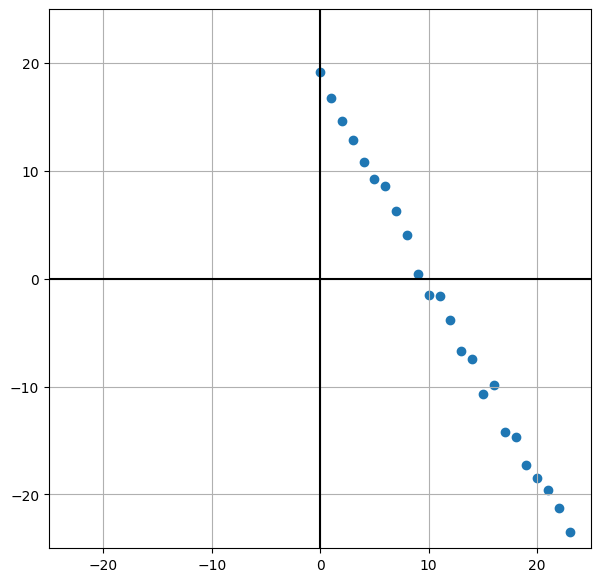

In [ ]:
# ваши параметры по вариантам
n=19
a_orig = -0.1 * n # по формуле (-1)^n * 0.1 * n, n - номер в списке группы n=19
b_orig = n # по формуле n*(-1)^(n+1), где n - номер в списке группы
random_state = 19 # х, где х - номер в списке группы

# формируем вектор параметров 
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)

# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [3]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([ 19.22100326,  16.75953499,  14.62225146,  12.89596844,
         10.79671057,   9.25614772,   8.63534374,   6.28075341,
          4.05241374,   0.43745405,  -1.54834132,  -1.63472727,
         -3.80089621,  -6.7159924 ,  -7.48801039, -10.69195205,
         -9.8444561 , -14.23329992, -14.67346575, -17.24996458,
        -18.47721425, -19.55784513, -21.24147873, -23.44400592,
        -25.6913967 ]))

### Вопрос — зачем был дописан вектор единиц справа к иксу?

**Ответ:**

Добавление столбца единиц в матрицу \( A \) необходимо для учёта **свободного члена** \( b \) в уравнении линейной регрессии:


$$ y = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b $$

Это позволяет модели корректно делать предсказание даже в случае, когда все признаки \( x_i = 0 \), то есть учитывать **постоянное смещение**.

Матрица с добавленным столбцом единиц и вектор параметров выглядят так:

$$
A =
\begin{bmatrix}
x_{11} & x_{12} & \cdots & 1 \\
x_{21} & x_{22} & \cdots & 1 \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & 1
\end{bmatrix},
\quad
\vec{x} =
\begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
b
\end{bmatrix}
$$

Предсказание модели тогда записывается в виде:

$$
y = A \vec{x}
$$

что эквивалентно:

$$
y = w \cdot x_i + b
$$

---

Таким образом, модель учитывает не только влияние признаков \( x_i \), но и добавляет фиксированное смещение \( b \).  
Это позволяет объединить все параметры в один вектор и использовать единое матричное представление.

Без столбца единиц модель могла бы описывать только прямые, проходящие через начало координат,  
а с ним — прямые, которые могут пересекать ось \( y \) в любой точке.  
Это расширяет пространство решений и делает модель более гибкой.


In [4]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
print("Оценка коэффициентов [a, b]:", a_b_analytical) 

Оценка коэффициентов [a, b]: [-1.84615614 18.42045507]


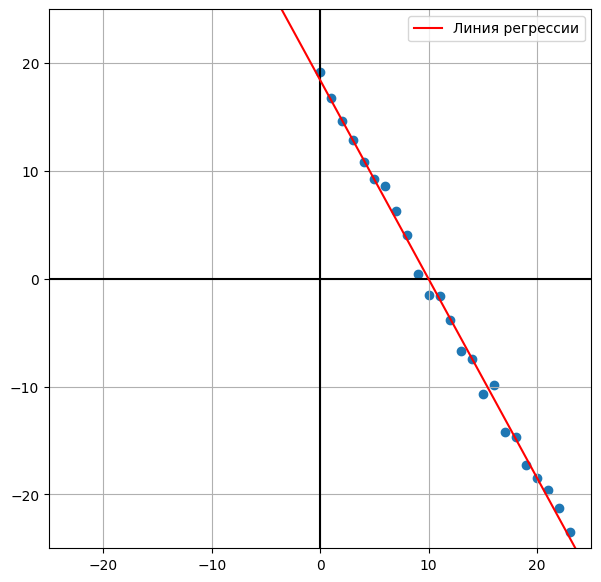

In [5]:
# постройте линию которая вышла рядом с изначальными данными


# Создаём рисунок (figure) и объект осей (axes) с размером 7x7
f, ax = plt.subplots(figsize=(7, 7))

# Рисуем точки (наблюдения)
plt.scatter(A[:, 0], y)

# устанавливаем границы осей
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
#Добавляем сетку
ax.grid(True)

# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые 
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
a, b = a_b_analytical
ax.plot([-25, 25], [a * -25 + b, a * 25 + b], color='red', label='Линия регрессии')
ax.legend()

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

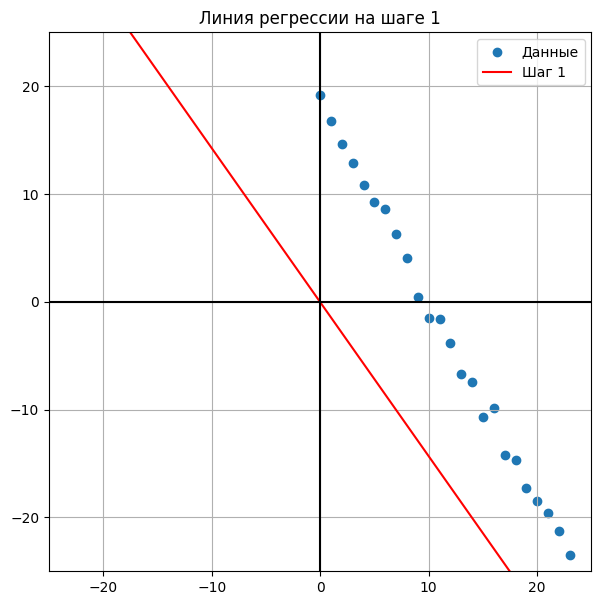

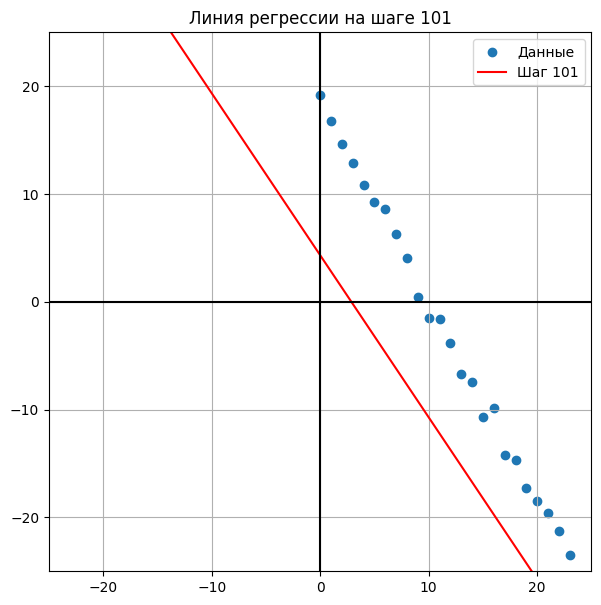

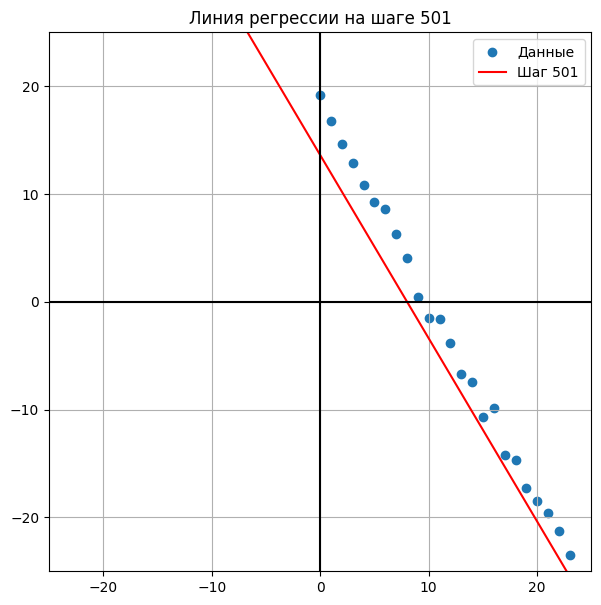

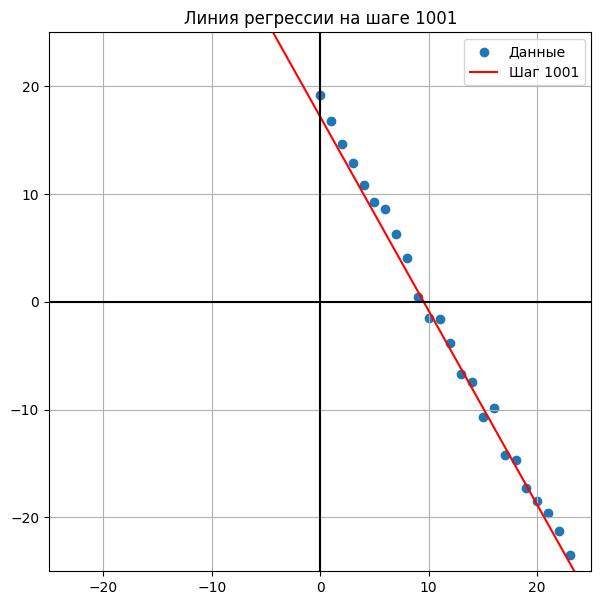

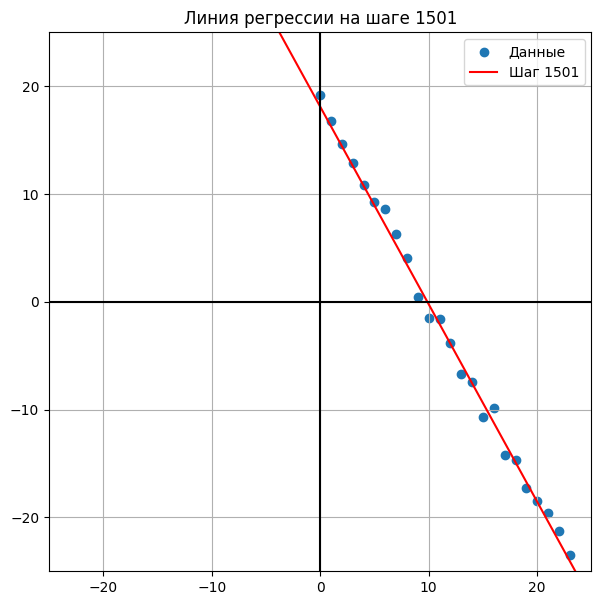

Оценка после градиентного спуска: a = -1.8325, b = 18.0926


In [2]:
import numpy as np
import matplotlib.pyplot as plt


n = 19
a_orig = -0.1 * n
b_orig = n
random_state = 19

x_orig = np.array([a_orig, b_orig])
np.random.seed(random_state)
A = np.stack([np.arange(0, 25), np.ones(25)]).T
y = A @ x_orig + np.random.standard_normal(25)

alpha = 0.000203
a_b = np.array([0.0, 0.0])
num_steps = 1501

# Шаги, на которых хотим построить графики
visual_steps = [1, 101, 501, 1001, 1501]
history = {}

# Градиентный спуск
for i in range(1, num_steps + 1):
    # Вычисляем градиент функции ошибки
    grad = 2 * A.T @ (A @ a_b - y)
    # Делаем шаг градиентного спуска
    a_b -= alpha * grad
    if i in visual_steps:
        history[i] = a_b.copy()


x_vals = np.array([-25, 25])

for step in visual_steps:
    a, b = history[step]
    y_line = a * x_vals + b

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.scatter(A[:, 0], y, label='Данные')
    ax.plot(x_vals, y_line, color='red', label=f'Шаг {step}')
    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    ax.axvline(0, color='black')
    ax.axhline(0, color='black')
    ax.grid(True)
    ax.set_title(f'Линия регрессии на шаге {step}')
    ax.legend()
    plt.show()


final_a, final_b = history[1501]
print(f"Оценка после градиентного спуска: a = {final_a:.4f}, b = {final_b:.4f}")


**Вывод:**

В ходе лабораторной работы мы рассмотрели два подхода к решению задачи линейной регрессии: аналитический и численный (градиентный спуск).
Оба метода минимизируют квадратичную ошибку и успешно работают даже при наличии шума в данных.
Аналитический метод позволяет получить точное решение напрямую, но может быть ресурсоёмким при работе с большими объёмами данных.
Градиентный спуск, в свою очередь, обеспечивает поэтапное приближение к оптимальному решению и хорошо масштабируется.
Полученные навыки применимы в реальных задачах, таких как оценка стоимости объектов, прогнозирование спроса или анализ тенденций.

